# Installing the `network_spatial_coherence` Package

Before running the example, you need to install the `network_spatial_coherence` package. You can do this using pip. Run the following command in a code cell:



In [1]:
# !pip install git+https://github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git
    
# # Use this this if the github has been updated
!pip install --upgrade --force-reinstall git+https://github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git




  Cloning https://github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git to /tmp/pip-req-build-uhk8mpzg
  Running command git clone --filter=blob:none --quiet https://github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git /tmp/pip-req-build-uhk8mpzg
  Resolved https://github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git to commit 27e8fbdffed06bb0c85a95590e9a0237a1b39e82
  Preparing metadata (setup.py) ... done


  Cloning https://github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git to /tmp/pip-req-build-59zl_pui
  Running command git clone --filter=blob:none --quiet https://github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git /tmp/pip-req-build-59zl_pui
  Resolved https://github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git to commit 27e8fbdffed06bb0c85a95590e9a0237a1b39e82
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for matplotlib==3.8.3 from https://files.pythonhosted.org/packages/ef/1d/bf1d78126c3d106100232d3a18b7f3732e7dc3b71ee38ab735e4064b19cc/matplotlib-3.8.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached matplotlib-3.8.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Obtaining dependency information for memory_profiler==0.61.0 from https://files.pythonhosted.org/packages/49/26/aaca612a0634ceede20682e692a6c55e35a94c21ba36b807cc40fe910ae1/memory_profiler-0.61.0-py3-n

  Obtaining dependency information for torch==2.1.0 from https://files.pythonhosted.org/packages/5b/13/fcabc86948f9e89b62a538670720f8589d63f93d3f4f3d172236a98e70f8/torch-2.1.0-cp311-cp311-manylinux1_x86_64.whl.metadata
  Using cached torch-2.1.0-cp311-cp311-manylinux1_x86_64.whl.metadata (25 kB)
  Using cached umap_learn-0.5.5-py3-none-any.whl
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/e2/83/29a63bbc72839cc6b24b5a0e3d004d4ed4e8439f26460ad9a34e39251904/contourpy-1.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached contourpy-1.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency inf

  Obtaining dependency information for igraph==0.11.4 from https://files.pythonhosted.org/packages/93/32/95d66d6fb3bc1b48d755686f0b3bf824ffa7eb4fad6227d414f65faeed7f/igraph-0.11.4-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached igraph-0.11.4-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.9 kB)
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/b1/2c/f504e55d98418f2fcf756a56877e6d9a45dd5ed28b3d7c267b300e85ad5b/threadpoolctl-3.3.0-py3-none-any.whl.metadata
  Using cached threadpoolctl-3.3.0-py3-none-any.whl.metadata (13 kB)
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/81/

  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/2a/14/e75e52d521442e2fcc9f1df3c5e456aead034203d4797867980de558ab34/tqdm-4.66.2-py3-none-any.whl.metadata
  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
  Obtaining dependency information for smart-open>=1.8.1 from https://files.pythonhosted.org/packages/ad/08/dcd19850b79f72e3717c98b2088f8a24b549b29ce66849cd6b7f44679683/smart_open-7.0.1-py3-none-any.whl.metadata
  Using cached smart_open-7.0.1-py3-none-any.whl.metadata (23 kB)
  Obtaining dependency information for llvmlite<0.43,>=0.42.0dev0 from https://files.pythonhosted.org/packages/a4/1f/300788b5eab99aec872ed2f3647386d7d7f7bbf4f99c91e9e023b404ff7f/llvmlite-0.42.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached llvmlite-0.42.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.8 kB)
  Obtaining dependency information for six>=1.5 from https://files.pythonhosted.org/packages/d9/5

Using cached contourpy-1.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (313 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.49.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.9 MB)
Using cached gensim-4.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached kiwisolver-1.4.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
Using cached nptyping-2.5.0-py3-none-any.whl (37 kB)
Using cached numba-0.59.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.7 MB)
Using cached numba_progress-1.1.0-py3-none-any.whl (8.3 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (62.2 MB)
Using cached packaging-24.0-py3-none-any.whl (53 kB)
Using cached pynndescent-0.5.11-py3-none-any.whl (55 kB)
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
Using cached python_dateutil-2.9

  Attempting uninstall: nvidia-cuda-nvrtc-cu12
    Found existing installation: nvidia-cuda-nvrtc-cu12 12.1.105
    Uninstalling nvidia-cuda-nvrtc-cu12-12.1.105:
      Successfully uninstalled nvidia-cuda-nvrtc-cu12-12.1.105
  Attempting uninstall: nvidia-cuda-cupti-cu12
    Found existing installation: nvidia-cuda-cupti-cu12 12.1.105
    Uninstalling nvidia-cuda-cupti-cu12-12.1.105:
      Successfully uninstalled nvidia-cuda-cupti-cu12-12.1.105
  Attempting uninstall: nvidia-cublas-cu12
    Found existing installation: nvidia-cublas-cu12 12.1.3.1
    Uninstalling nvidia-cublas-cu12-12.1.3.1:
      Successfully uninstalled nvidia-cublas-cu12-12.1.3.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
  Attempting uninstall: Markup

    Found existing installation: network-spatial-coherence 0.1.0
    Uninstalling network-spatial-coherence-0.1.0:
      Successfully uninstalled network-spatial-coherence-0.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
spyder 5.4.3 requires pyqt5<5.16, which is not installed.
spyder 5.4.3 requires pyqtwebengine<5.16, which is not installed.
botocore 1.29.76 requires urllib3<1.27,>=1.25.4, but you have urllib3 2.2.1 which is incompatible.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires python-dateutil==2.8.2, but you have python-dateutil 2.9.0.post0 which is incompatible.
conda-repo-cli 1

If that doesn't work you might have to authenticate yourself. This usually involves generating a personal access token (PAT) in GitHub with the necessary permissions to clone the repository. 

In [2]:
!pip install git+https://<token>:x-oauth-basic@github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git


/bin/bash: line 1: token: No such file or directory


## Accessing Documentation

To access the documentation for `network_spatial_coherence`, you can use the `access_docs` function. This can be helpful to understand what the package can and cannot do and also to get definitions on every parameter


In [3]:
from network_spatial_coherence.docs_util import access_docs

# To simply open the documentation:
access_docs()


Attempting to copy documentation from: /home/david/anaconda3/lib/python3.11/site-packages/network_spatial_coherence/docs/build/html
Opening documentation in web browser...


## Running a minimum working example

First, let's create the project structure and explore the default configuration options provided by the package.


In [4]:
from network_spatial_coherence import structure_and_args

structure_and_args.create_project_structure()
structure_and_args.export_default_config('default_config.py')


Copied example_edge_list.pickle to /home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence/data/edge_lists/example_edge_list.pickle
Copied dna_cool2.png to /home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence/data/colorcode/dna_cool2.png
Project structure created under '/home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence'
Default configuration template written to default_config.py


### Customizing Configuration

You can customize the configuration by editing the default config file exported in the previous step, or directly modify the arguments in the code. Here's how you can modify the arguments directly in the code:


/home/david/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Copied example_edge_list.pickle to /home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence/data/edge_lists/example_edge_list.pickle
Copied dna_cool2.png to /home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence/data/colorcode/dna_cool2.png
Project structure created under '/home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence'
proximity_mode delaunay_corrected
AVERAGE DEGREE DELAUNAY CORRECTED: 5.836
num_points 1000
edge_list_title edge_list_N=1000_dim=2_delaunay_corrected_k=10.csv
Unweighted graph
Edge list columns are valid.
(False, False, 708, 82.80701754385966, 83.00117233294256)
original graph size
Average Degree sparse: 5.836
retrieving edges from edge_list_N=1000_dim=2_delaunay_corrected_k=10.csv


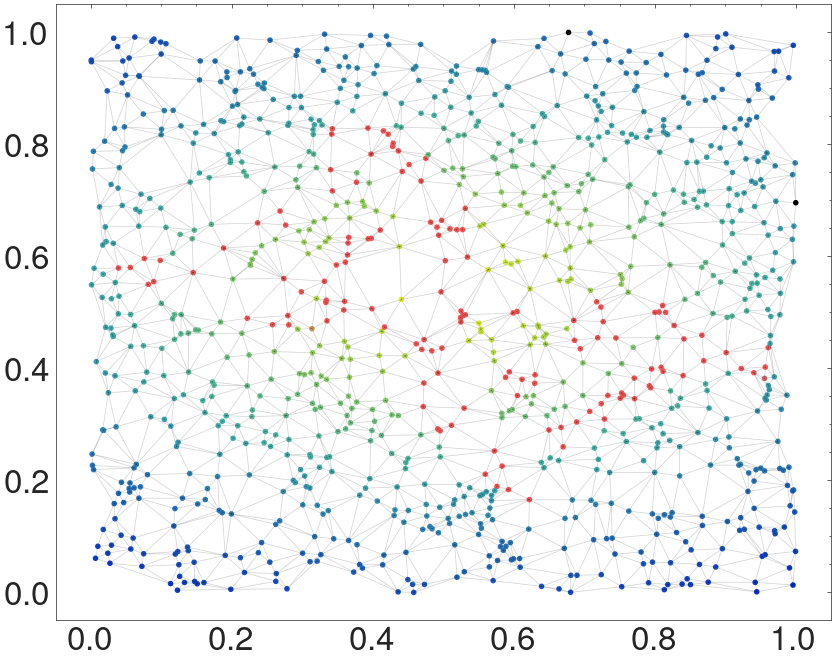

Graph is not an igraph instance. Converting to igraph...
Unweighted graph
Edge list columns are valid.
(False, False, 708, 82.80701754385966, 83.00117233294256)
average degree igraph 5.836
num points 1000


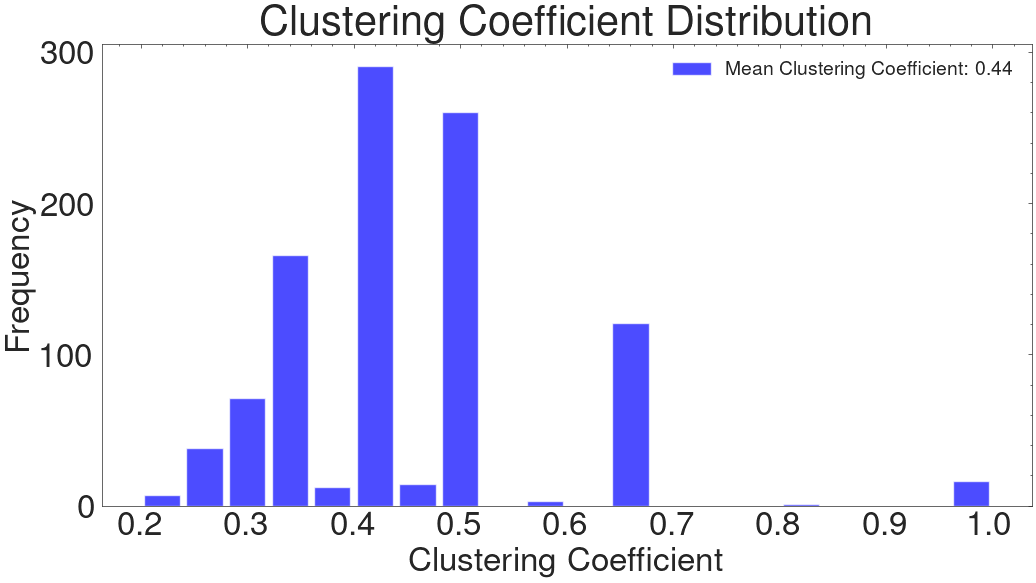

N=1000_dim=2_delaunay_corrected_k=10


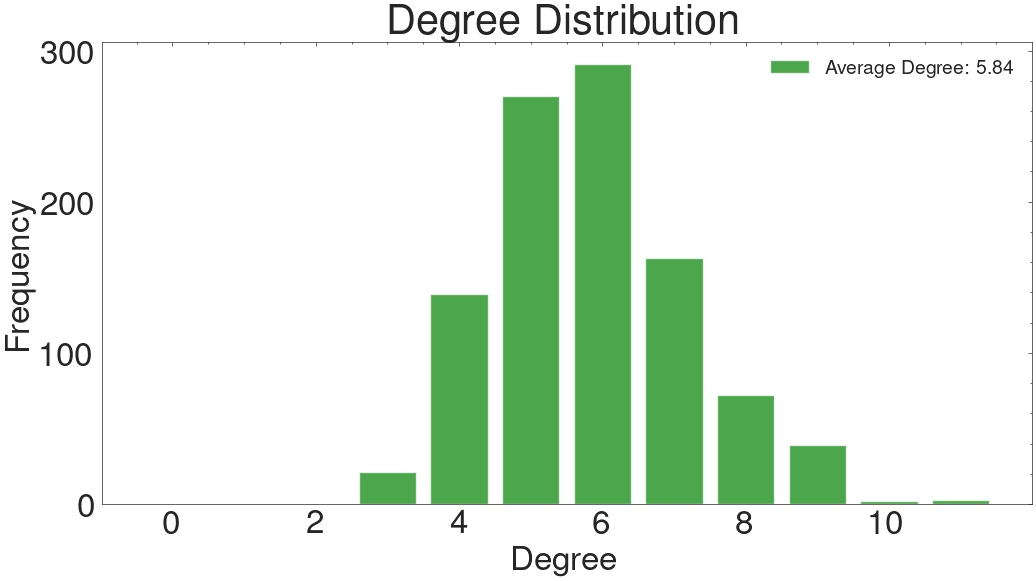

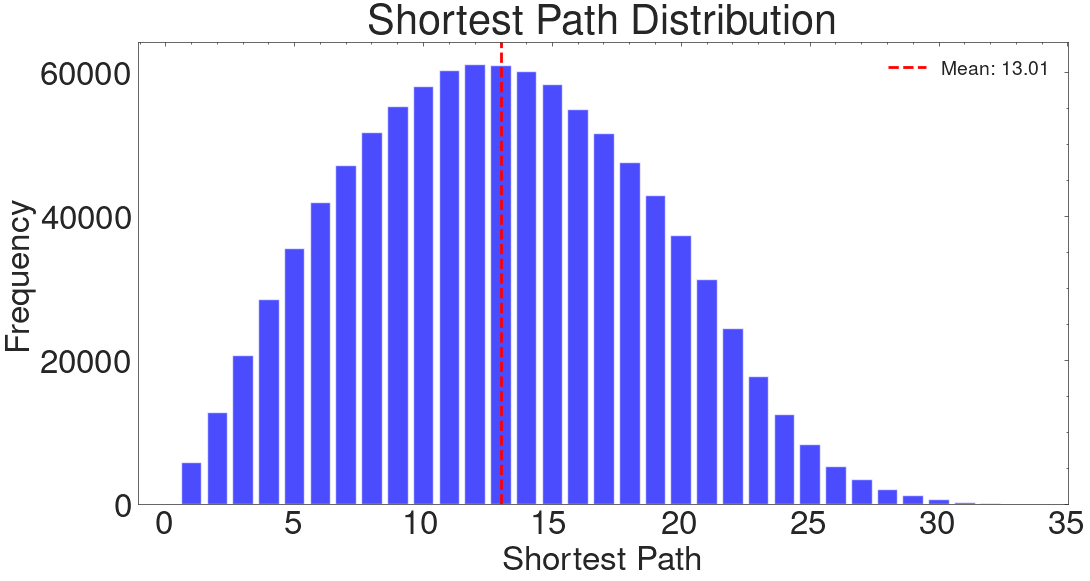

100
Graph is not an igraph instance. Converting to igraph...
size: 50
size: 150
size: 250
size: 350
size: 450
size: 550
size: 650
size: 750
size: 850
size: 950
size: 1000
size: 50
size: 150
size: 250
size: 350
size: 450
size: 550
size: 650
size: 750
size: 850
size: 950
size: 1000
size: 50
size: 150
size: 250
size: 350
size: 450
size: 550
size: 650
size: 750
size: 850
size: 950
size: 1000
size: 50
size: 150
size: 250
size: 350
size: 450
size: 550
size: 650
size: 750
size: 850
size: 950
size: 1000
size: 50
size: 150
size: 250
size: 350
size: 450
size: 550
size: 650
size: 750
size: 850
size: 950
size: 1000
size: 50
size: 150
size: 250
size: 350
size: 450
size: 550
size: 650
size: 750
size: 850
size: 950
size: 1000


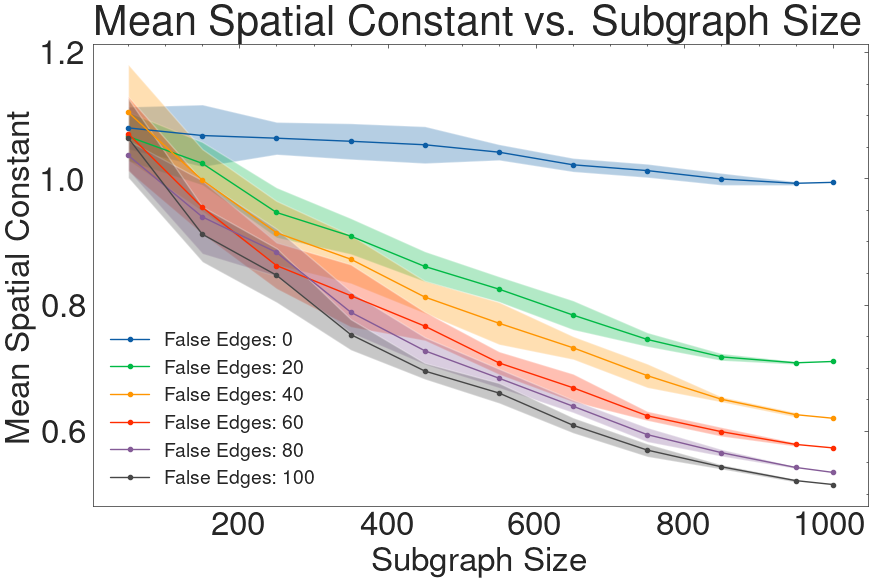

Average Degree 5.836


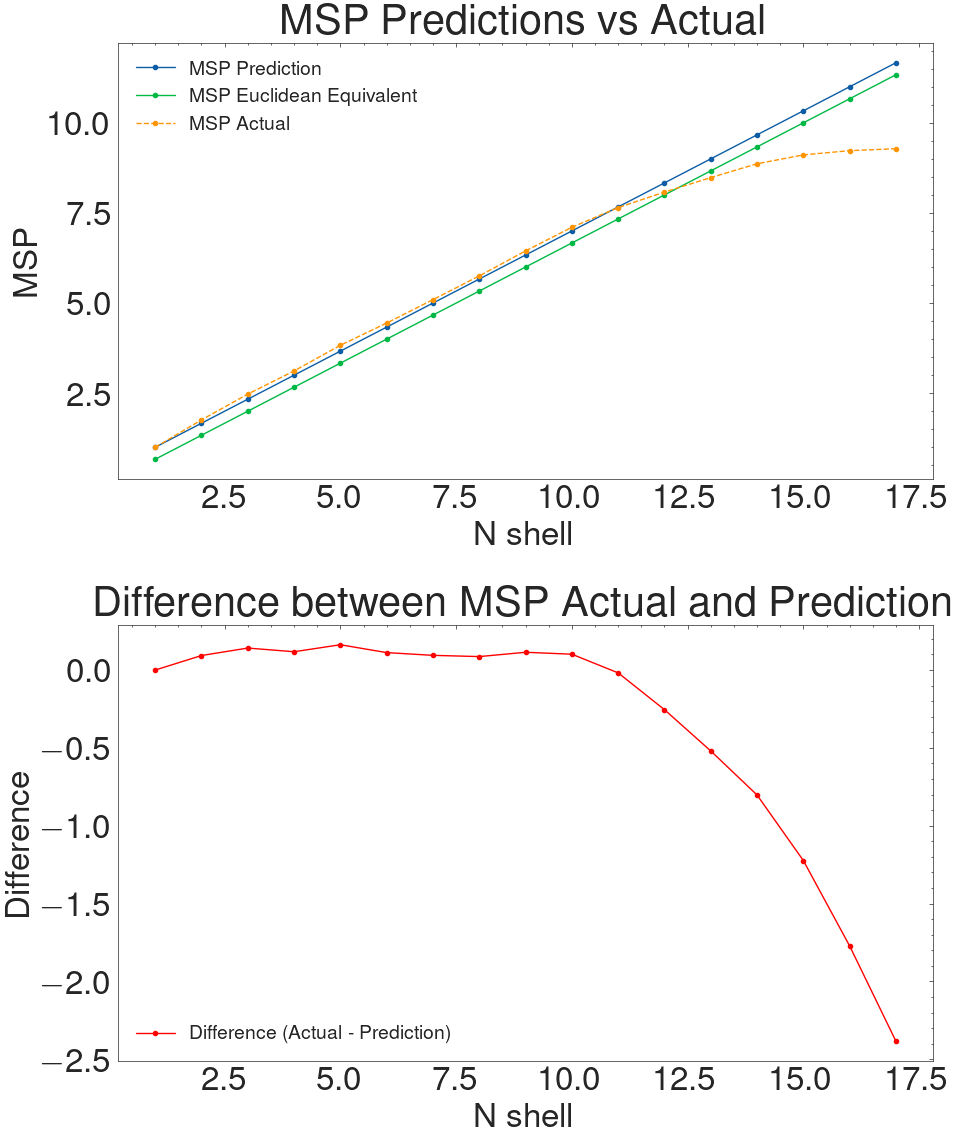

Surface Counts [  6  19  34  43  62  65  78  90 108 114 101  79  71  65  39  17   7   1
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Volume Counts [  6  25  59 102 164 229 307 397 505 619 720 799 870 935 974 991 998 999
 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999]
PREDICTED DIMENSIONS [1.         1.52       1.72881356 1.68627451 1.8902439  1.70305677
 1.77850163 1.81360202 1.92475248 1.84168013 1.54305556 1.1864831 ]


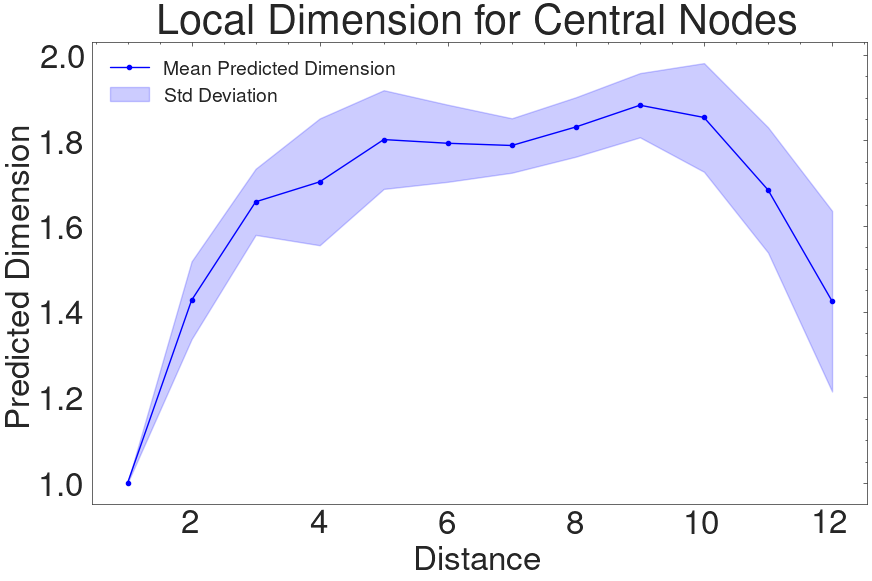

UNCERTAINTY PREDICTED DIMENSION 0.046178320657450755
RESULTS DIMENSION PREDICTION {'predicted_dimension': 1.90923749129188, 'std_predicted_dimension': 0.004425739304785488}
PREDICTED DIMENSION CENTRAL INDEX, euclidean = False 1.982737379419212
x data [ 1  2  3  4  5  6  7  8  9 10 11 12]
y data [  6  25  59 102 164 229 307 397 505 619 720 799]


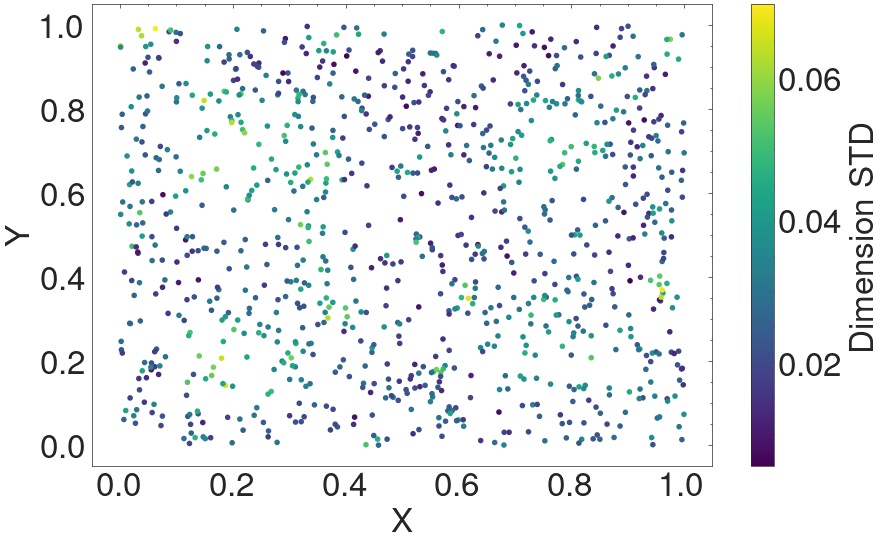

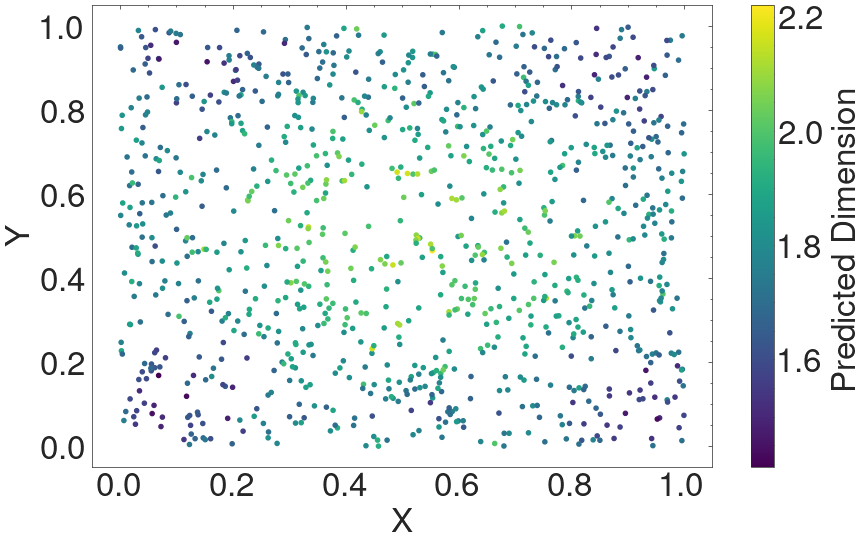

Results predicted dimension ({'predicted_dimension': 1.90923749129188, 'std_predicted_dimension': 0.004425739304785488}, {'log_x_data': array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
       1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509,
       2.39789527, 2.48490665]), 'log_y_data': array([1.79175947, 3.21887582, 4.07753744, 4.62497281, 5.09986643,
       5.433722  , 5.72684775, 5.98393628, 6.22455843, 6.42810527,
       6.57925121, 6.68336095]), 'slope': 1.982737379419212, 'intercept': 1.8536163816380884, 'predicted_dimension': [1.708673009790463, 1.6527277316490652, 1.7887598789470842, 1.5909758226354955, 1.6902496759102386, 1.8344931269585394, 2.0618098391700532, 1.9132500876915273, 1.5253175714239182, 1.9290731755902892, 1.9193287535262757, 1.7336960260467884, 1.7996462495828163, 1.6869268907022636, 1.8364334649085532, 1.6729639644267924, 1.7690769661039434, 1.7118422946947078, 1.8978987221103036, 1.5774198724572368, 1.695162146282398, 1.72337187345

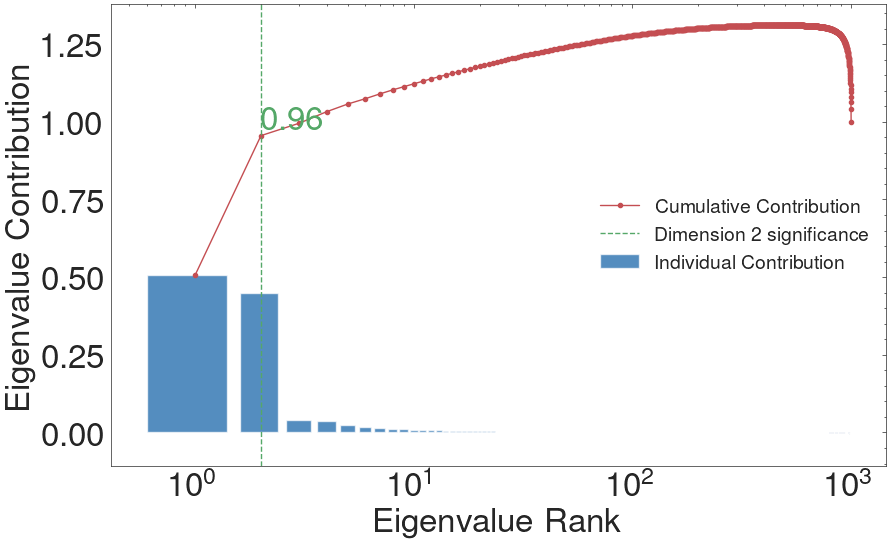

First d values contribution 0.9553415312193133
running reconstruction...
reconstruction mode: node2vec


  0%|                                                 | 0/10000 [00:00<?, ?it/s]

retrieving edges from edge_list_N=1000_dim=2_delaunay_corrected_k=10.csv


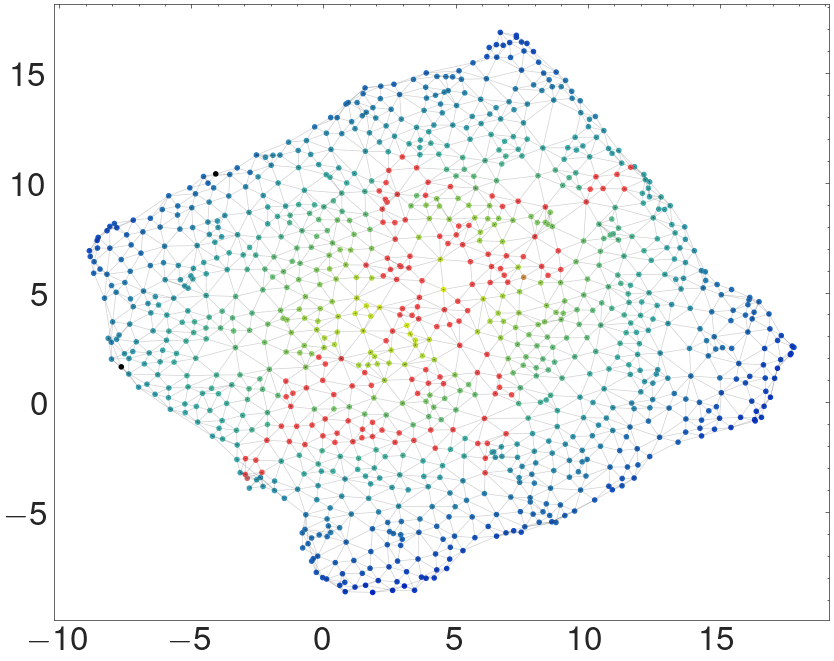

original neighbors [791 517 956 260 801 287 717 769 171 966 697 467 839 511 267]
reconstructed neighbors [517 171 791 769 956 260 279  76 240 287 717 966 267 513 697]
{'KNN': 0.8271999999999955, 'CPD': 0.987789856884554}
{'GTA_KNN': 0.8543564935064945, 'GTA_CPD': 0.9688937311737901}


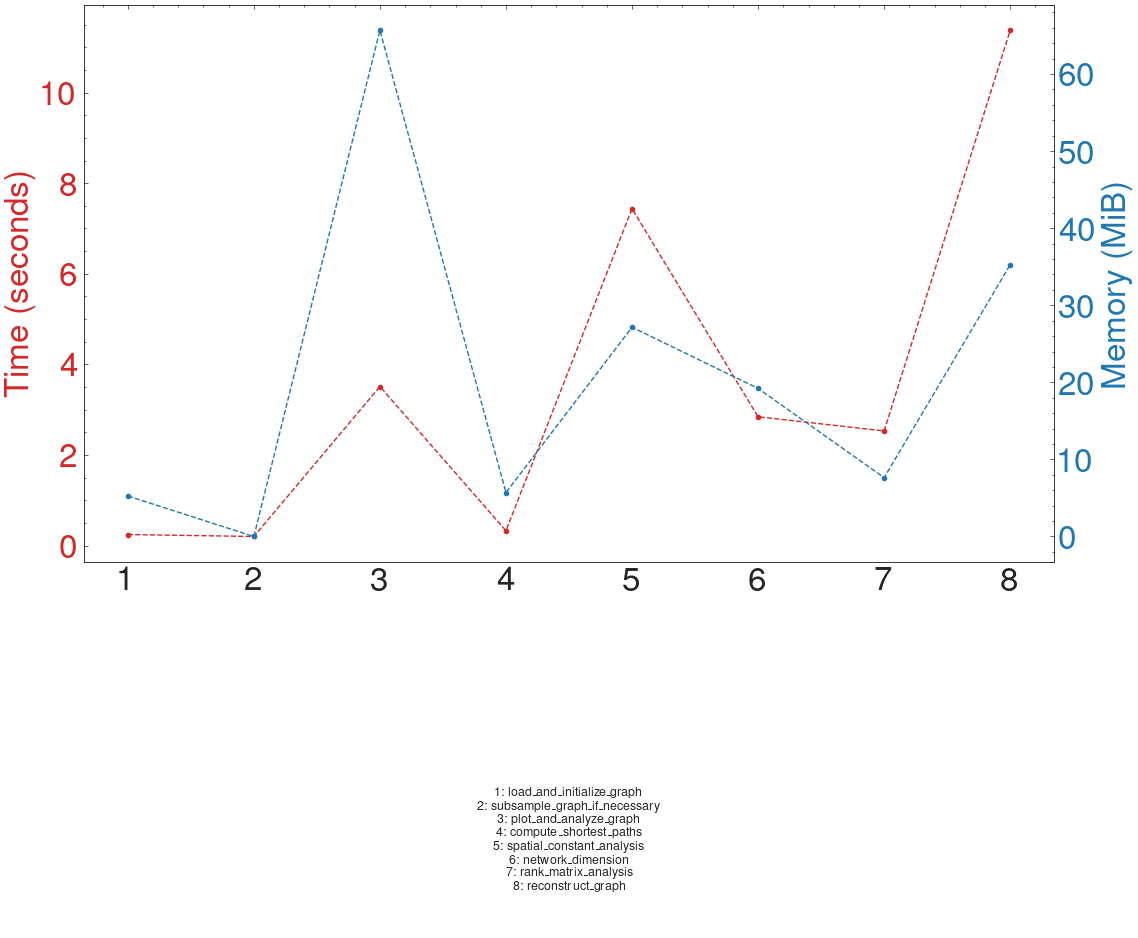

In [5]:
from network_spatial_coherence import nsc_pipeline
import os

# Modify individual parameters
args = structure_and_args.GraphArgs()
args.show_plots = True
args.plot_graph_properties = True
args.colorfile = 'dna_cool2.png'
args.proximity_mode = 'delaunay_corrected'
args.num_points = 1000
args.spatial_coherence_validation['network_dimension'] = True

   # TODO: solve how it is updated, solve random plots popping up, solve graph with false edges after running spatial constant

# Load and process the graph
graph, args = nsc_pipeline.load_and_initialize_graph(args=args)


# Run the pipeline and plot the results
single_graph_args = nsc_pipeline.run_pipeline(graph, args)
nsc_pipeline.plot_profiling_results(single_graph_args)
